Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            155, 156, 157, 158, 159, 160, 161, 162, 163, 164],
           dtype='int64', length=165)
138
138
Int64Index([165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
            ...
            293, 294, 295, 296, 297, 298, 299, 300, 301, 302],
           dtype='int64', length=138)
0.8554216867469879
0.8192771084337349
0.8554216867469879
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)           

193/193 [==============================] - 0s 175us/step - loss: 0.3095 - acc: 0.8912 - val_loss: 0.4588 - val_acc: 0.8313
Results for Categorical Model
0.8313253012048193
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        45
           1       0.83      0.79      0.81        38

    accuracy                           0.83        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.83      0.83      0.83        83

0.8554216867469879


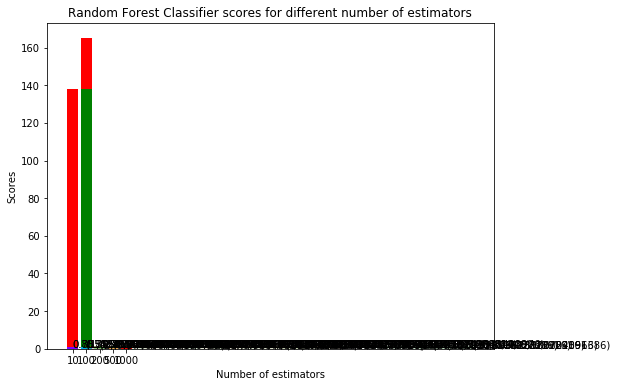

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv('data1.csv')
data.rename(columns = {'target':'TEST'}, inplace = True) 
rcParams['figure.figsize'] = 8,6
plt.bar(data['TEST'].unique(), data['TEST'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
maj_indices=data[data['TEST']==1].index
print(maj_indices)
min_len=len(data[data['TEST']==0]) 
print(min_len)
random_maj_inices=np.random.choice(maj_indices,min_len,replace=True)
print(len(random_maj_inices))
min_indices=data[data['TEST']==0].index
print(min_indices)
under_indices=np.concatenate([min_indices,random_maj_inices])
dfk=data.loc[under_indices]
dataset = pd.get_dummies(dfk, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['TEST'].unique(), dataset['TEST'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
target='TEST'
X=dataset.loc[:,dataset.columns!=target]
Y=dataset.loc[:,dataset.columns==target]
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.30) 
me=[]
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
me.append(max(knn_scores))
acc1=max(knn_scores)
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))
print(max(svc_scores))
acc2=max(svc_scores)

me.append(max(svc_scores))
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
print(max(dt_scores))
me.append(max(dt_scores))
acc3=max(dt_scores)

    
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))
print(max(rf_scores))
me.append(max(rf_scores))
acc4=max(rf_scores)

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=30, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()
model.summary()
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
acc5=accuracy_score(y_test, categorical_pred)

print(classification_report(y_test, categorical_pred))
me.append(accuracy_score(y_test, categorical_pred))
print(max(me))

import pickle

if acc1 >= acc2 and acc1 >= acc3 and acc1>= acc4 and acc1 >= acc5 :

    with open("hear", "wb") as f:
        pickle.dump(knn_classifier, f)
elif acc2 >= acc1 and acc2 >= acc3 and acc2>= acc4 and acc2 >= acc5 :

    with open("hear", "wb") as f:
        pickle.dump(svc_classifier, f)
elif acc3 >= acc1 and acc3 >= acc2 and acc3>= acc4 and acc4 >= acc5 :

    with open("hear", "wb") as f:
        pickle.dump(dt_classifier, f)
elif acc4 >= acc1 and acc4 >= acc3 and acc4>= acc2 and acc4 >= acc5 :

    with open("hear", "wb") as f:
        pickle.dump(rf_classifier, f)
elif acc5 >= acc2 and acc5 >= acc3 and acc5>= acc4 and acc5 >= acc4 :

    with open("hear", "wb") as f:
        pickle.dump(model, f)
  
  